# ДЗ 1. Байесовская генерация и автоэнкодеры

# 1. Байесовский генератор стилей

# Часть 1

Испльзуя данные о популярных стилях из файла styles.py написать генератор (можно в виде функции, можно ввите класа [generator](https://wiki.python.org/moin/Generators)):
1. Использует данные о стилях
2. На основе формулы MLE и формулы Байеса о полной вероятности генерировать случайный стиль
3. Так же вернуть вероятность генерации данного стиля

In [1]:
from styles import styles, styles_count
from stylist import Stylist  # see stylist.py for more details

stylist = Stylist(styles, styles_count)

In [2]:
for _ in range(5):
    stylist.suggest_style()
    print('\n')

Here is your style:

Прическа: короткая курчавые
Цвет волос: черный
Аксесуар: круглые очки
Одежда: футболка с круглым вырезом
Цвет одежды: черный

Probability of this combination: 0.00028


Here is your style:

Прическа: длинные прямые
Цвет волос: серебристо серый
Аксесуар: солнцезащитные очки
Одежда: футболка с круглым вырезом
Цвет одежды: розовый

Probability of this combination: 0.00367


Here is your style:

Прическа: короткая прямые
Цвет волос: серебристо серый
Аксесуар: солнцезащитные очки
Одежда: худи
Цвет одежды: синий

Probability of this combination: 0.00049


Here is your style:

Прическа: короткая волнистые
Цвет волос: рыжий
Аксесуар: круглые очки
Одежда: худи
Цвет одежды: красный

Probability of this combination: 5e-05


Here is your style:

Прическа: нет волос
Цвет волос: блонд
Аксесуар: круглые очки
Одежда: комбинезон
Цвет одежды: красный

Probability of this combination: 0.00037




# Часть 2

4. Используя в качестве фичей пиксели изображений аватаров (см папку avatars) написать генератор изображений, который генерирует новый аватар
5. Генератор выбирает значение каждого канала каждого пикселя используя распределение вероятностей, полученных на основе изображений avatars; генерация так же осуществляется с помощью MLE
6. Выложить в репозиторий 5 сгенерированных аватаров

In [3]:
import os

import cv2
import numpy as np
from PIL import Image


def load_images(dir, downscaling_factor=1):
    images = []
    for fname in os.listdir(dir):
        if fname.endswith(".png"):
            path = os.path.join(dir, fname)
            image = cv2.imread(path)
            # downscale images to accelerate generation
            if downscaling_factor < 1:
                image = cv2.resize(
                    image, (0, 0), fx=downscaling_factor, fy=downscaling_factor
                )
            images.append(image)
    return np.stack(images)

In [4]:
images = load_images("avatars", downscaling_factor=0.3)
images.shape

(11, 168, 158, 3)

In [5]:
variants = np.transpose(images, (1, 2, 3, 0))
grouped_variants = np.copy(variants)
probs = np.zeros_like(variants, dtype=DTYPE)

NameError: name 'DTYPE' is not defined

In [ ]:
variants.shape

In [ ]:
DTYPE = np.float16

In [ ]:
from tqdm.auto import trange

In [ ]:
def count_pixel_probs(pixel_variants, padding=np.array([-1])):
    unique_values, counts = np.unique(pixel_variants, return_counts=True, axis=0)
    pad_size = len(pixel_variants) - len(unique_values)
    unique_values = np.concatenate(
        (unique_values, padding.repeat(pad_size, axis=0)), axis=0
    )
    counts = np.concatenate((counts, np.full(pad_size, 0)))
    probs = counts / sum(counts)
    return unique_values, probs

In [ ]:
for x in trange(variants.shape[0]):
    for y in range(variants.shape[1]):
        for z in range(variants.shape[2]):
            pixel_variants = variants[x, y, z, :]
            unique_values, pixel_probs = count_pixel_probs(pixel_variants)
            grouped_variants[x, y, z, :] = unique_values
            probs[x, y, z, :] = pixel_probs

In [ ]:
probs[155, 155, 1, :]

In [ ]:
grouped_variants[155, 155, 1, :]

In [ ]:
variants[155, 155, 1, :]

In [ ]:
count_pixel_probs(variants[155, 155, 1, :])

In [ ]:
p = 1
new_img = np.zeros(grouped_variants.shape[:3])

for x in trange(new_img.shape[0]):
    for y in range(new_img.shape[1]):
        for z in range(new_img.shape[2]):
            pixel_variants = grouped_variants[x, y, z, :]
            pixel_probs = probs[x, y, z, :]
            pixel_value = np.random.choice(pixel_variants, p=pixel_probs)
            prob = pixel_probs[np.where(pixel_variants == pixel_value)][0]
            new_img[x, y, z] = pixel_value
            p *= prob

In [ ]:
p

In [ ]:
Image.fromarray(np.uint8(new_img))

In [ ]:
Image.fromarray(np.uint8(new_img))

In [ ]:
variants = np.transpose(images, (1, 2, 0, 3))
grouped_variants = np.copy(variants)
probs = np.zeros(variants.shape[:3], dtype=DTYPE)

In [ ]:
probs.shape

In [ ]:
padding = np.full((1, variants.shape[-1]), -1)
padding

In [ ]:
count_pixel_probs(variants[155, 155, :, :], padding=padding)

In [ ]:
grouped_variants[155, 155, :, :]

In [ ]:
padding = np.full((1, variants.shape[-1]), -1)

for x in trange(variants.shape[0]):
    for y in range(variants.shape[1]):
        pixel_variants = variants[x, y, :, :]
        unique_values, pixel_probs = count_pixel_probs(pixel_variants, padding=padding)
        grouped_variants[x, y, :, :] = unique_values
        probs[x, y, :] = pixel_probs

In [ ]:
probs.shape

In [ ]:
p = 1
new_img = np.zeros(images.shape[1:])

for x in trange(new_img.shape[0]):
    for y in range(new_img.shape[1]):
        pixel_variants = grouped_variants[x, y, :, :]
        pixel_probs = probs[x, y, :]
        indices = np.arange(pixel_variants.shape[0])
        idx = np.random.choice(indices, p=pixel_probs)
        pixel_value = pixel_variants[idx]
        prob = pixel_probs[idx]
        new_img[x, y, :] = pixel_value
        p *= prob

In [ ]:
new_img[:, :, ::-1]

In [ ]:
new_img_rgb = new_img[:, :, ::-1]
Image.fromarray(np.uint8(new_img_rgb))

In [ ]:
pixel_variants = grouped_variants[155, 155, :, :]
pixel_probs = probs[155, 155, :]
indices = np.arange(pixel_variants.shape[0])
idx = np.random.choice(indices, p=pixel_probs)
pixel_value = pixel_variants[idx]
pixel_prob = pixel_probs[idx]
pixel_value
# pixel_value = np.random.choice(pixel_variants, p = pixel_probs)

In [ ]:
probs[x, y, :]

In [ ]:
np.random.randint(0, 12, grouped_variants.shape[:3], p=pixel_probs)

In [ ]:
np.random.choice(grouped_variants, size=grouped_variants.shape[:3])

In [ ]:
pixel_variants = grouped_variants[155, 155, 1, :]
pixel_probs = probs[155, 155, 1, :]
pixel_value = np.random.choice(pixel_variants, p=pixel_probs)
pixel_variants, pixel_probs, pixel_value

In [ ]:
grouped_variants.shape[:3]

In [ ]:
new_img.shape

In [ ]:
grouped_variants.shape

In [ ]:
display(new_img)

In [ ]:
new_img.dtype = np.float32
new_img.dtype

In [ ]:
import cv2

cv2.imshow("1.png", new_img)

In [ ]:
a = np.zeros((2, 2))
a[:, 0] = [1, 1]
b = np.zeros_like(a)
b[1, :] = [1, 1]
b

In [6]:
from avatars import AvatarGenerator # see avatars.py for more details

avatar_gen = AvatarGenerator(dtype=np.float32)
avatar_gen.fit(images)

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

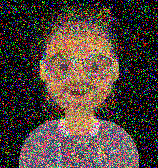

The probability of this image is: 0.0


  0%|          | 0/168 [00:00<?, ?it/s]

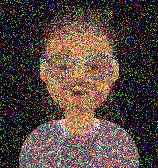

The probability of this image is: 0.0


  0%|          | 0/168 [00:00<?, ?it/s]

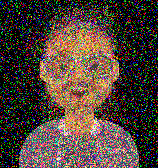

The probability of this image is: 0.0


  0%|          | 0/168 [00:00<?, ?it/s]

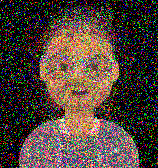

The probability of this image is: 0.0


  0%|          | 0/168 [00:00<?, ?it/s]

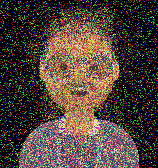

The probability of this image is: 0.0


  0%|          | 0/168 [00:00<?, ?it/s]

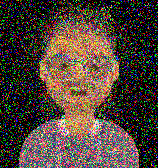

The probability of this image is: 0.0


  0%|          | 0/168 [00:00<?, ?it/s]

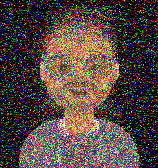

The probability of this image is: 0.0


  0%|          | 0/168 [00:00<?, ?it/s]

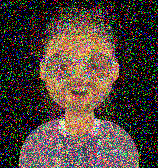

The probability of this image is: 0.0


  0%|          | 0/168 [00:00<?, ?it/s]

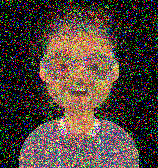

The probability of this image is: 0.0


  0%|          | 0/168 [00:00<?, ?it/s]

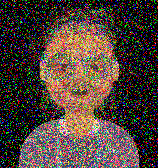

The probability of this image is: 0.0


In [7]:
for _ in range(10):
    avatar_gen.generate(save=True)

Получившиеся картинки довольно похожи, но между ними все же можно найти различия (между картинками бОльшего размера визуальных различий было еще меньше).

Вероятности полученных картинок получились равными 0, т.к. пикселей много, и произведение такого количество чисел от 0 до 1 дало в результате очень маленькое число, дробная часть которого не поместилась во float32.